In [1]:
import numpy as np
import pandas as pd
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
def loadCSV(filename):
    file = filename
    if '.csv' not in filename:
        file += '.csv'
    data = pd.read_csv(file, encoding = 'ISO-8859-1')
    return data

In [3]:
csvFile = "processed_hate_speech"
data = loadCSV(csvFile)

In [4]:
data.head()

,tweet_text,confidence,tweet_class
0,warning penny boards will make you a faggot,0.6013,1
1,fuck dykes,0.7227,2
2,[@] [@] [@] [@] [@] at least i dont look like ...,0.5229,2
3,[@] [@] [@] is a fag jackie jealous neeeee,0.5184,2
4,[@] you heard me bitch but any way im back th ...,0.5185,1


In [5]:
data.tail()

,tweet_text,confidence,tweet_class
14504,im sorry did i offend your white supremacist a...,0.3418,0
14505,[@] caucasian euro aryan whatever really doesn...,0.6804,0
14506,[@] sir a patient named aryan khan village mee...,1.0000,0
14507,[@] happy birthday bro have an happy year ahead,1.0000,0
14508,[@] aryan kapoor is such a cute name tho d we...,1.0000,0


# Calculate Frequency of Unique Words By Class

In [6]:
def iterateFreq(dictionary, word):
    if dictionary.get(word, False):
        dictionary[word] += 1
    else:
        dictionary[word] = 1

In [7]:
def wordFrequencies(dataframe):
    all_tweets = {}
    neutral = {}
    offensive = {}
    hate = {}
    
    for index, row in dataframe.iterrows():
        tweet = row[0]
        tweet_class = row[2]
        
        tweet_words = tweet.split()
        
        for word in tweet_words:
            if tweet_class == 0:
                iterateFreq(neutral, word)
            elif tweet_class == 1:
                iterateFreq(offensive, word)
            elif tweet_class == 2:
                iterateFreq(hate, word)
                
            iterateFreq(all_tweets, word)
    
    return all_tweets, neutral, offensive, hate

In [8]:
def dispWordFreq(dictionary):
    unique_words = sorted( ((v,k) for k, v in dictionary.items()), reverse = True)
    for v, k in unique_words:
        word_val = "%s: %d" % (k, v)
        print(word_val)

In [9]:
all_wf, neutral_wf, offensive_wf, hate_wf = wordFrequencies(data)

# Generating Initial Word Clouds

In [10]:
def generateWordCloud(dict):
    wordcloud = WordCloud(background_color='white', width=900,height=500, max_words=1628,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(dict)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

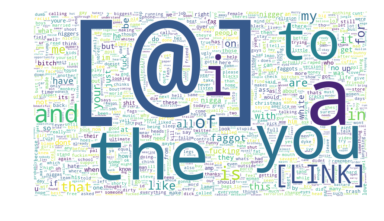

In [11]:
generateWordCloud(all_wf)

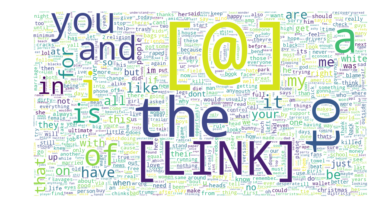

In [12]:
generateWordCloud(neutral_wf)

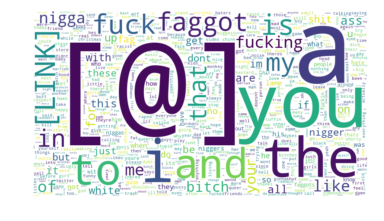

In [13]:
generateWordCloud(offensive_wf)

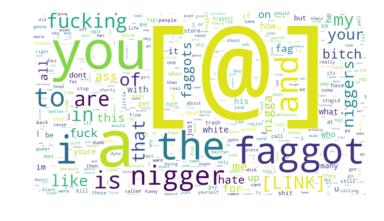

In [14]:
generateWordCloud(hate_wf)

# Eliminating Uninformative Words

In [15]:
filterList = ["[@]", "a", "[LINK]", "the", "my", "you", "and", "to", "of", "i", "it", "is", "in", "for", "that", "me", "your", "have", "all", "are", "this", "but", "on", "be", "no", "with", "im", "if", "up", "at", "so", "when", "get", "just"]
allDicts = [all_wf, neutral_wf, offensive_wf, hate_wf]

In [16]:
def removeWords(dict):
    for word in filterList:
        if word in dict:
            del dict[word]

In [17]:
for dict in allDicts:
    removeWords(dict)

# Generate Filtered WordClouds

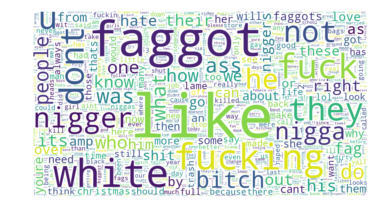

In [18]:
generateWordCloud(all_wf)

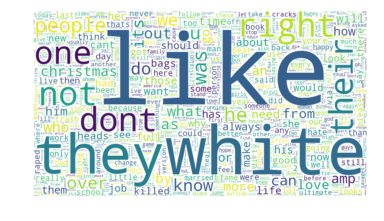

In [19]:
generateWordCloud(neutral_wf)

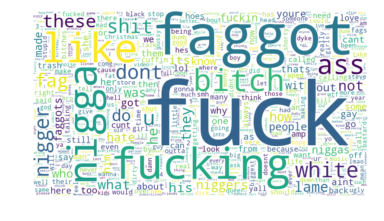

In [20]:
generateWordCloud(offensive_wf)

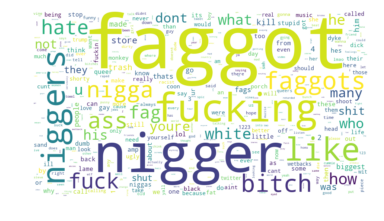

In [21]:
generateWordCloud(hate_wf)

# Generate Stemmed WordCloud

In [22]:
stem_csvFile = "stemmed_hate_speech"
stem_data = loadCSV(stem_csvFile)

In [28]:
stem_all_wf, stem_neutral_wf, stem_offensive_wf, stem_hate_wf = wordFrequencies(data)
stemDicts = [stem_all_wf, stem_neutral_wf, stem_offensive_wf, stem_hate_wf]
for dict in stemDicts:
    removeWords(dict)

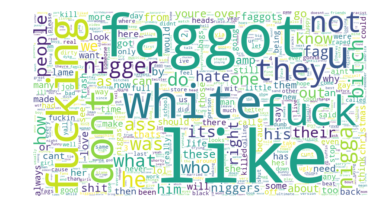

In [29]:
generateWordCloud(stem_all_wf)

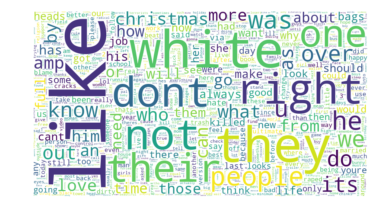

In [30]:
generateWordCloud(stem_neutral_wf)

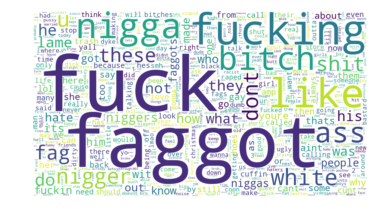

In [31]:
generateWordCloud(stem_offensive_wf)

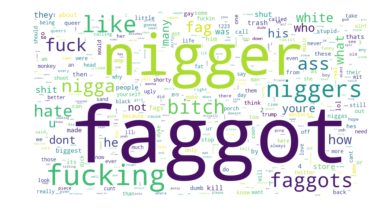

In [32]:
generateWordCloud(stem_hate_wf)